In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv('BIG FIVE 1995-2019.csv')

In [36]:
data.isna().sum()

Round           0
Date            0
Team 1          0
FT              0
HT              0
Team 2          0
Year            0
Country         0
FT Team 1       0
FT Team 2       0
HT Team 1       0
HT Team 2       0
GGD             0
Team 1 (pts)    0
Team 2 (pts)    0
dtype: int64

In [37]:
data.describe()

,Round,Year,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts)
count,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000
mean,18.852154,2007.006641,1.539271,1.112065,0.680137,0.477987,1.319388,1.669498,1.065960
std,10.694362,7.130475,1.282207,1.109638,0.824792,0.695605,1.187047,1.300856,1.237966
min,1.000000,1995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,2007.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,28.000000,2013.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,3.000000
max,42.000000,2019.000000,10.000000,9.000000,7.000000,6.000000,9.000000,3.000000,3.000000


In [38]:
data['Goals'] = data['FT Team 1'] + data['FT Team 2']

In [39]:
fig_size=(18, 6)
sns.set(rc = {'figure.figsize': fig_size})

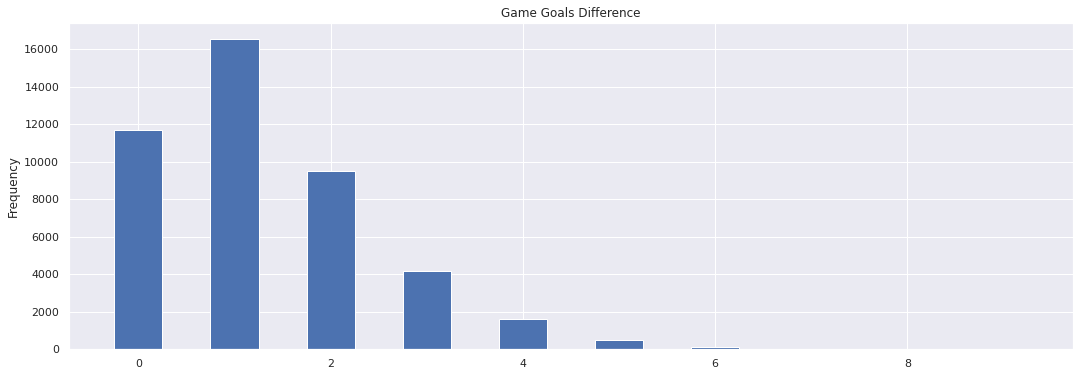

In [40]:
data['GGD'].plot.hist(bins = np.linspace(-.25,9.25,20), title='Game Goals Difference');

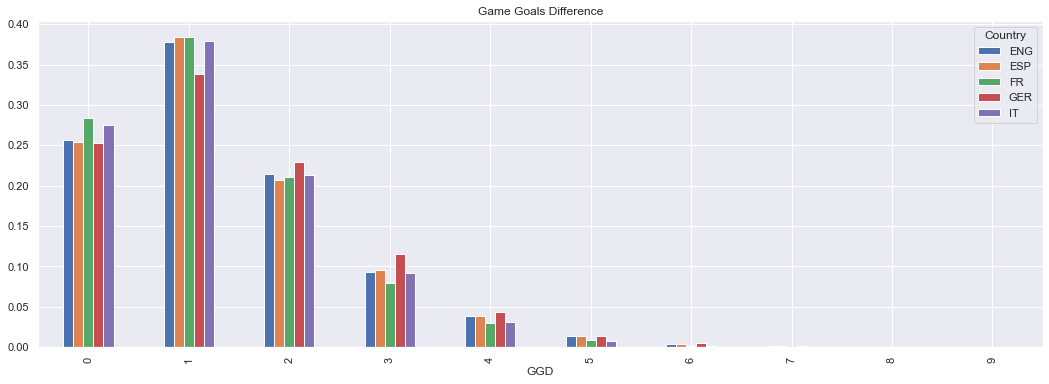

In [99]:
pd.crosstab(data['GGD'], data['Country'], normalize='columns').plot.bar(title='Game Goals Difference');

# Winners of the league

In [80]:
df_rank = data.groupby(['Country', 'Year', 'Team 1'], as_index=False)['Team 1 (pts)'].sum().merge(
data.groupby(['Country','Year','Team 2'], as_index=False)['Team 2 (pts)'].sum(),right_on=['Country','Year','Team 2'],left_on=['Country','Year','Team 1'])

df_rank['Pts'] = df_rank['Team 1 (pts)'] + df_rank['Team 2 (pts)']
df_rank=df_rank[['Country','Year','Team 1','Pts']]
df_rank.rename(columns={'Team_1':'Team'}, inplace=True)

In [81]:
df_rank_new = df_rank.groupby(['Year', 'Country'])[['Team 1','Pts']].max('Pts')
df_rank_new['Winner'] = 1

In [82]:
final_data = df_rank.merge(df_rank_new, how = 'left', on=['Year', 'Country', 'Pts'])
final_data['Winner'] = final_data['Winner'].fillna(0)

In [96]:
winners = final_data[final_data.Winner == 1].groupby(['Country', 'Team 1']).count().reset_index()
winners = winners[['Country', 'Team 1', 'Winner']]

In [97]:
winners

,Country,Team 1,Winner
0,ENG,Arsenal FC,3
1,ENG,Chelsea FC,5
2,ENG,Leicester City FC,1
3,ENG,Liverpool FC,1
4,ENG,Manchester City FC,4
5,ENG,Manchester United FC,12
6,ESP,Atlético Madrid,2
7,ESP,FC Barcelona,14
8,ESP,RCD La Coruña,1
9,ESP,Real Madrid,7


# PREMIER LEAGUE

# All Time Winners

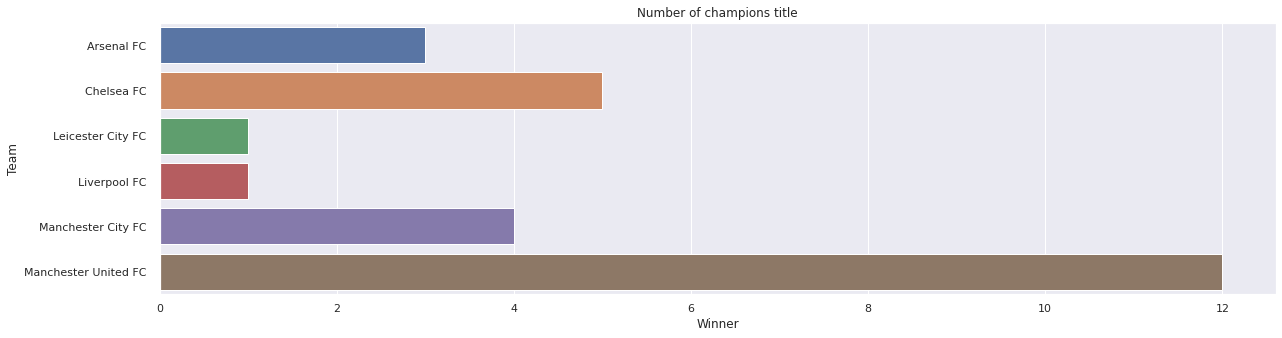

In [145]:
sns.barplot('Winner','Team 1', data = winners[winners.Country == 'ENG'])
plt.title('Number of champions title') 
plt.ylabel('Team');

## Year-wise analysis

In [141]:
EPL_data = data[data.Country == 'ENG']
EPL_data.rename(columns={'Team 1':'HomeTeam', 
                         'Team 2':'AwayTeam',
                         'FT Team 1': 'HomeGoals',
                         'FT Team 2': 'AwayGoals',
                         'Team 1 (pts)':'HomeTeamPts',
                         'Team 2 (pts)':'AwayTeamPts'}, inplace=True)
EPL_data.drop(['FT', 'HT', 'HT Team 1', 'HT Team 2'], axis = 1, inplace = True)

In [142]:
EPL_by_season = EPL_data.groupby(['Year']).sum()
EPL_by_season = EPL_by_season.reset_index()

In [143]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 5)

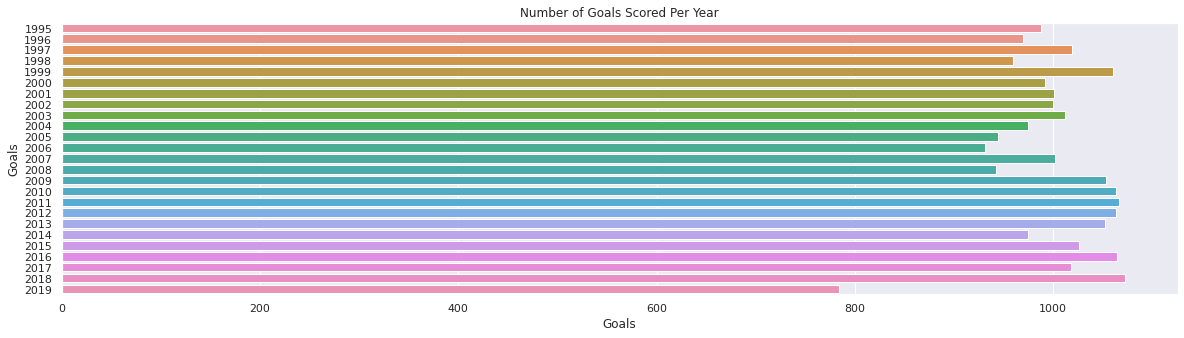

In [144]:
EPL_by_season['Year'] = EPL_by_season['Year'].apply(lambda x : str(x))
sns.barplot('Goals','Year', data = EPL_by_season)
plt.title('Number of Goals Scored Per Year') 
plt.ylabel('Goals');

In [146]:
EPL_melted = EPL_by_season[['Year', 'HomeGoals', 'AwayGoals']]
EPL_melt = EPL_melted.melt("Year", var_name="H/A",value_name="Goals")
EPL_melt

,Year,H/A,Goals
0,1995,HomeGoals,580
1,1996,HomeGoals,559
2,1997,HomeGoals,592
3,1998,HomeGoals,553
4,1999,HomeGoals,635
5,2000,HomeGoals,587
6,2001,HomeGoals,557
7,2002,HomeGoals,570
8,2003,HomeGoals,572
9,2004,HomeGoals,570


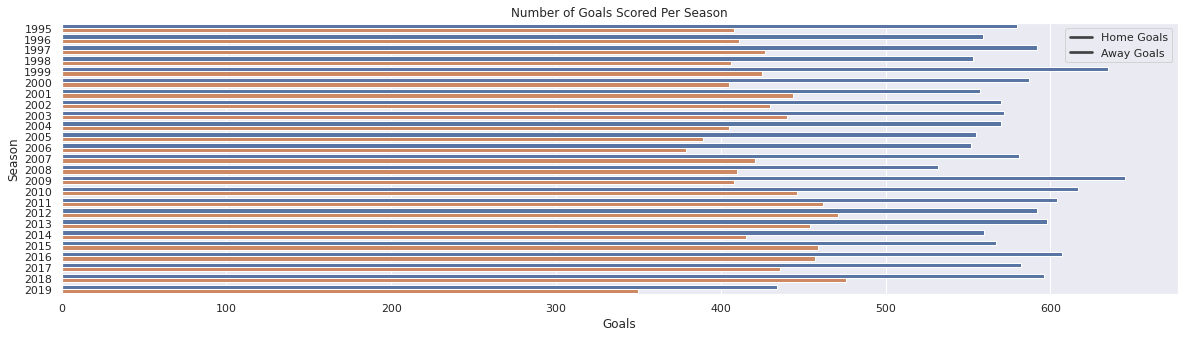

In [149]:
sns.barplot('Goals', 'Year', hue = 'H/A',data = EPL_melt)
plt.title('Number of Goals Scored Per Season') 
plt.ylabel('Season')
plt.legend(['Home Goals', 'Away Goals']);

## Team-wise comparison

In [150]:
EPL_home = EPL_data.groupby(EPL_data.HomeTeam)
EPL_away = EPL_data.groupby(EPL_data.AwayTeam)

In [151]:
EPL_team_goals = EPL_home['HomeGoals'].sum() + EPL_away['AwayGoals'].sum()
EPL_team_goals = EPL_team_goals.reset_index()
EPL_team_goals.rename( columns={0 :'Goals'}, inplace=True )
EPL_team_goals = EPL_team_goals.sort_values(['Goals'], ascending=False)

Text(0, 0.5, 'Team')

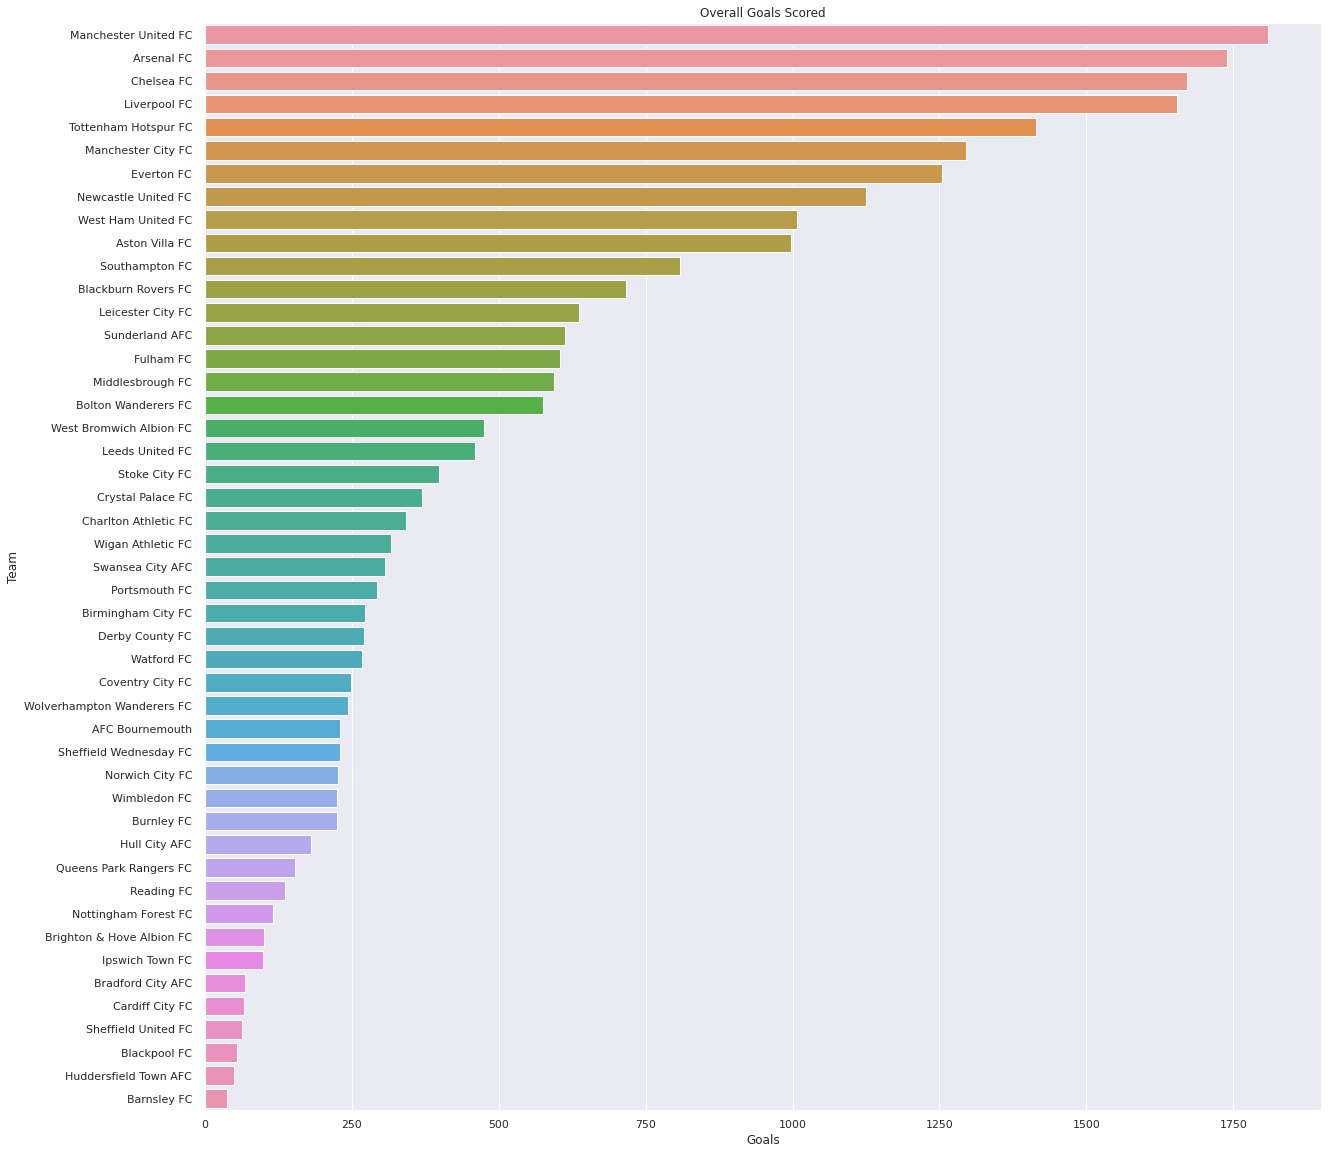

In [153]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.barplot("Goals",'HomeTeam', data = EPL_team_goals )
plt.title('Overall Goals Scored')
plt.ylabel('Team')